# Decision trees

* Load data
* Visualize impurity in a feature

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Power consumption data from Tétouan, Morocco
# There are three zones with power consumption (note zone 2/3 column name spaces) and all are pretty correlated with temperature
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00616/Tetuan%20City%20power%20consumption.csv')
df

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


## Visualize/analyze impurity

* Check overall label impurity with no classification
* Pick a feature and median split, and see how much impurity decreases
* Like in week 1 where we tried to manually maximize accuracy, let's try to minimize impurity manually

In [4]:
# Make GT label, True if power consumption for a Zone 1 instance is above average, otherwise False
# (note that we can't do `.column` because of spaces in filename)
df['label'] = df['Zone 1 Power Consumption'] > df['Zone 1 Power Consumption'].mean()
df

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,label
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,True
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,False
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,False
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,False
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,False
...,...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,False
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,False
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,False
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,False


In [5]:
df.label.value_counts()

label
False    26419
True     25997
Name: count, dtype: int64

In [6]:
# What if our model said all instances belong to below-average (False) class? (ZeroR)
df['prediction'] = False
(df.label == df.prediction).sum() / len(df)  # Predictions would be fairly wrong

0.5040254884004884

In [7]:
# Let's save instead predictions for a model that makes a prediction based on temperature median split
df['prediction'] = df.Temperature > df.Temperature.median()
(df.label == df.prediction).sum() / len(df)  # Better!

0.6372863247863247

### Gini impurity

In [8]:
# Gini impurity: probability of misclassification
# Simplified version for binary classification problems
def gini(class1_count, class2_count):
    n = class1_count + class2_count
    # If one is very large the other is small, and so impurity is lower
    return 2 * class1_count / n * class2_count / n

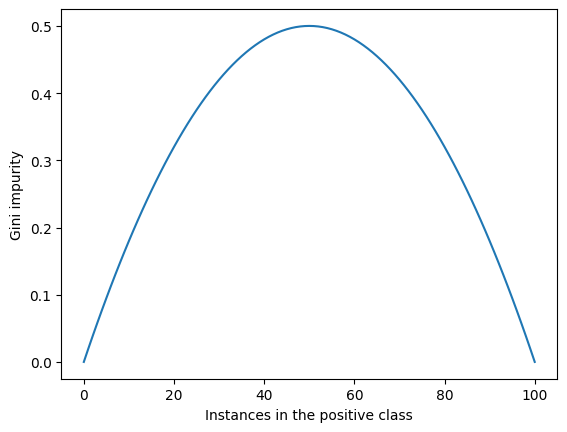

In [9]:
# Compute impurity for values 0 to 100
impurity = [gini(c, 100 - c) for c in range(101)]

# Plot impurity for values 0 to 100
plt.plot(np.linspace(0, 100, 101), impurity)
plt.xlabel('Instances in the positive class')
plt.ylabel('Gini impurity')
plt.show()  
# Maximized when 50/50 labels, max value = 0.5

In [10]:
# Apply to our dataset
gini((df.label == True).sum(), (df.label == False).sum())  

0.49996759088627507

In [11]:
# Remember we have a balanced dataset, close to 50-50
df.label.value_counts()

label
False    26419
True     25997
Name: count, dtype: int64

In [12]:
# Now let's look at our model (that makes a prediction based on temperature median split)
# We will split data into two groups, based on whether model predictions are True/False
pred_pos = df[df.prediction == True] 
pred_neg = df[df.prediction == False] #p(False)

# Note: Calculating Gini impurity is always computed based on the ground truth (GT) labels, not the predictions
# If the groups (e.g., pred_pos and pred_neg) are mixed with both True and False labels, the impurity will be high, 
# which means the model isn't doing a great job of separating the classes.

# Compute Gini separately for the True and False prediction groups 
# and average by weighting each group's Gini impurity according to the number of instances in each group
pred_pos_gini = gini((pred_pos.label == True).sum(), (pred_pos.label == False).sum())
pred_neg_gini = gini((pred_neg.label == True).sum(), (pred_neg.label == False).sum())
print(f'Gini True Subset:{pred_pos_gini}', f'Gini False Subset:{pred_neg_gini}')

avg_gini = (pred_pos_gini * len(pred_pos) + pred_neg_gini * len(pred_neg)) / (len(pred_pos) + len(pred_neg))
print(f'Gini weighted average for our model:{avg_gini}')

Gini True Subset:0.4644695431612219 Gini False Subset:0.4600771774280243
Gini weighted average for our model:0.4622729413036916


### Manually minimize impurity'
Our model makes predictions based on the temperature median split.

So we have to find the best point to split the temperature.

Let's plot impurities for all split points and see where Gini impurity is minimized.

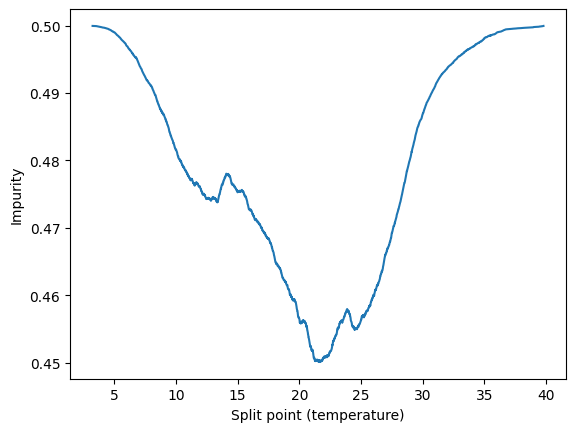

0.4501235238876726

In [13]:
# Continuous temperature features: need split points
# Create cutoffs: list unique temperature values in the dataset, sort them
# Exclude the last value (we do not need it since no points would be in the  "greater than" group 
# and zero samples would mean div zero errors in our code)
cutoffs = sorted(df.Temperature.unique())[:-1] 
impurities = [] # storing Gini impurities

for cutoff in cutoffs:
    df['prediction'] = df.Temperature > cutoff
    pred_pos = df[df.prediction == True]
    pred_neg = df[df.prediction == False]
    pred_pos_gini = gini((pred_pos.label == True).sum(), (pred_pos.label == False).sum())
    pred_neg_gini = gini((pred_neg.label == True).sum(), (pred_neg.label == False).sum())
    avg_gini = (pred_pos_gini * len(pred_pos) + pred_neg_gini * len(pred_neg)) / (len(pred_pos) + len(pred_neg))
    impurities.append(avg_gini)

plt.plot(cutoffs, impurities)
plt.xlabel('Split point (temperature)')
plt.ylabel('Impurity')
plt.show()

# Now we can also find the actual min value by looking at all impurities
min(impurities)

In [14]:
# Now we can find the best split point that achieves this minimum impurity 
best_index = np.argmin(impurities)
# And then find the best cutoff value for temperature to start building our Decision Tree
best_cutoff = cutoffs[best_index]
print('The best cutoff was:', best_cutoff)

The best cutoff was: 21.58


## Building Decision Trees with sklearn

In [15]:
# Split data in train and test subsets
train_df = df.iloc[:45000]
test_df = df.iloc[45000:]

[Text(0.5, 0.75, 'Temperature <= 21.785\ngini = 0.498\nsamples = 45000\nvalue = [21085.0, 23915.0]'),
 Text(0.25, 0.25, 'gini = 0.487\nsamples = 28949\nvalue = [16795, 12154]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.392\nsamples = 16051\nvalue = [4290, 11761]'),
 Text(0.625, 0.5, '  False')]

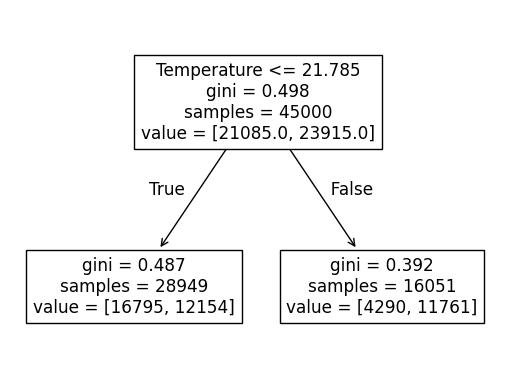

In [16]:
# Build our DT model, same as before this model will make a prediction based on temperature median split 
from sklearn import tree

model = tree.DecisionTreeClassifier(min_samples_leaf=15000)
features = ['Temperature']
train_X = train_df[features] # just get the temperature feature

model.fit(train_X, train_df.label)
tree.plot_tree(model, feature_names=features)

In [17]:
# Slightly different from our previous result because of different data split (training data only)
avg_gini = (0.487 * 28949 + 0.392 * 16051) / (28949 + 16051)  
avg_gini

0.4531145555555555

## Visualize tree

Visualize with more features.

Check overfitting when increasing `min_samples_leaf`

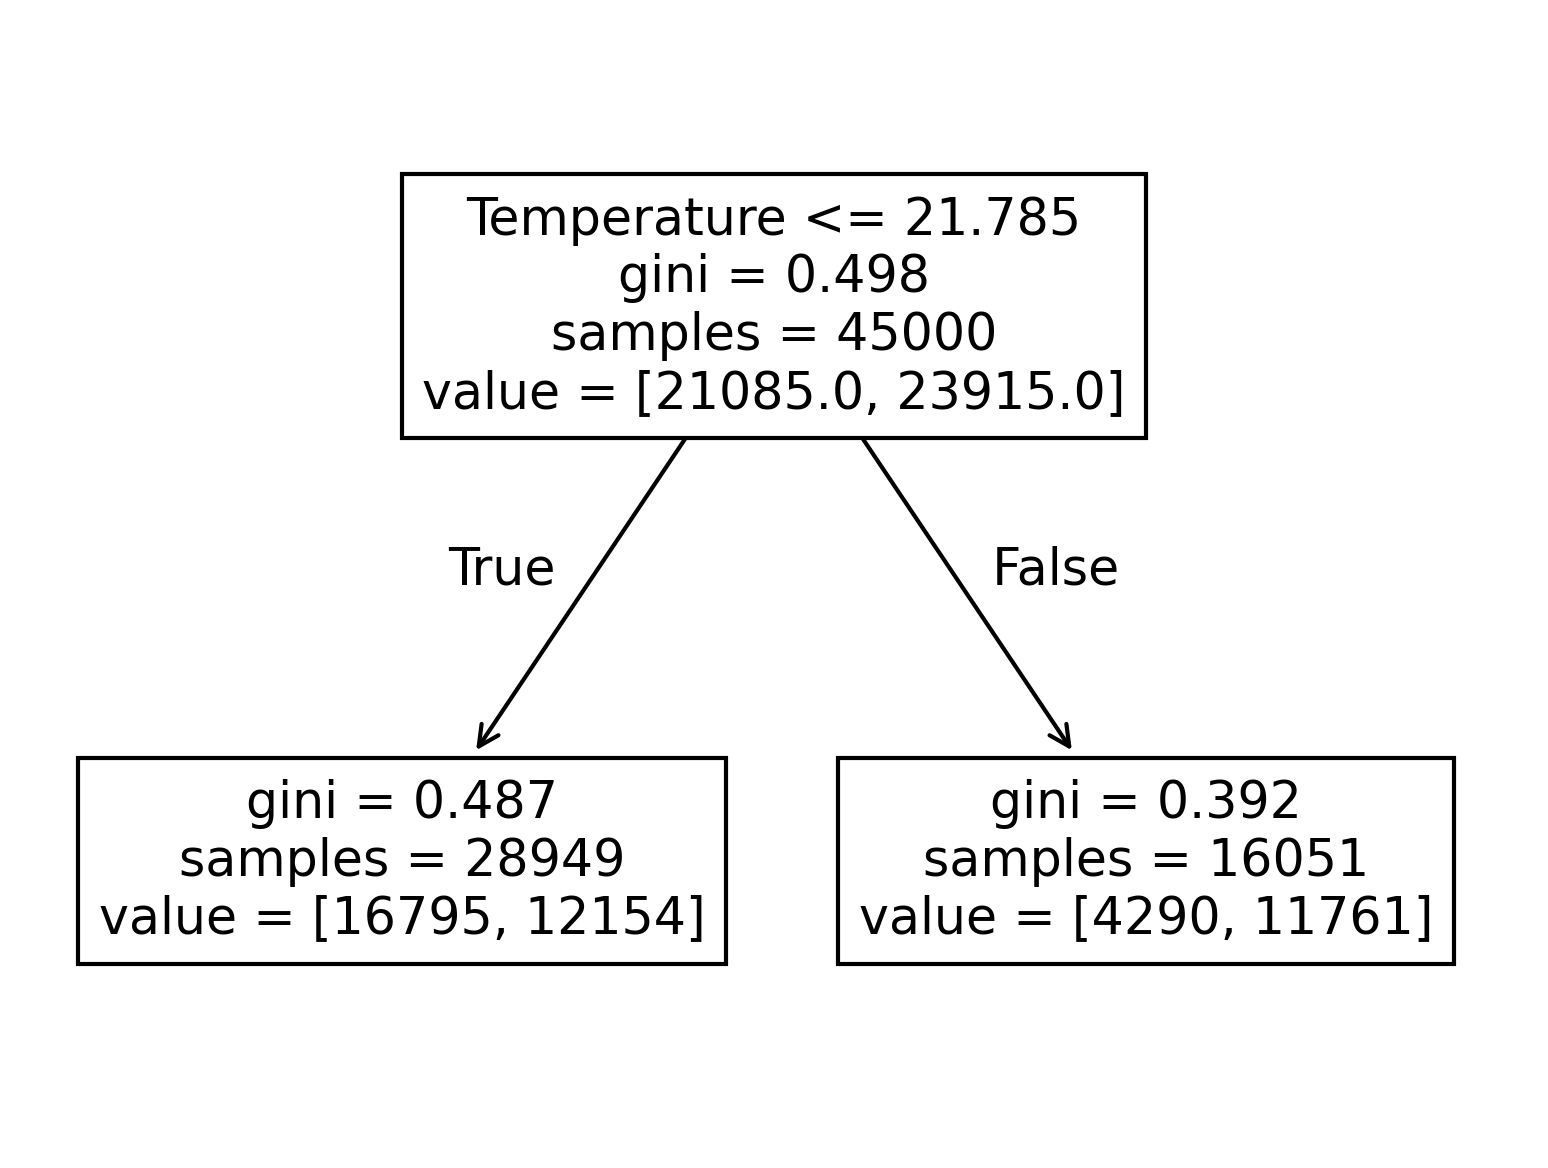

In [18]:
model = tree.DecisionTreeClassifier(min_samples_leaf=15000)
features = ['Temperature', 'Humidity', 'Wind Speed']
train_X = train_df[features]

model.fit(train_X, train_df.label)
plt.figure(dpi=300)
_ = tree.plot_tree(model, feature_names=features)

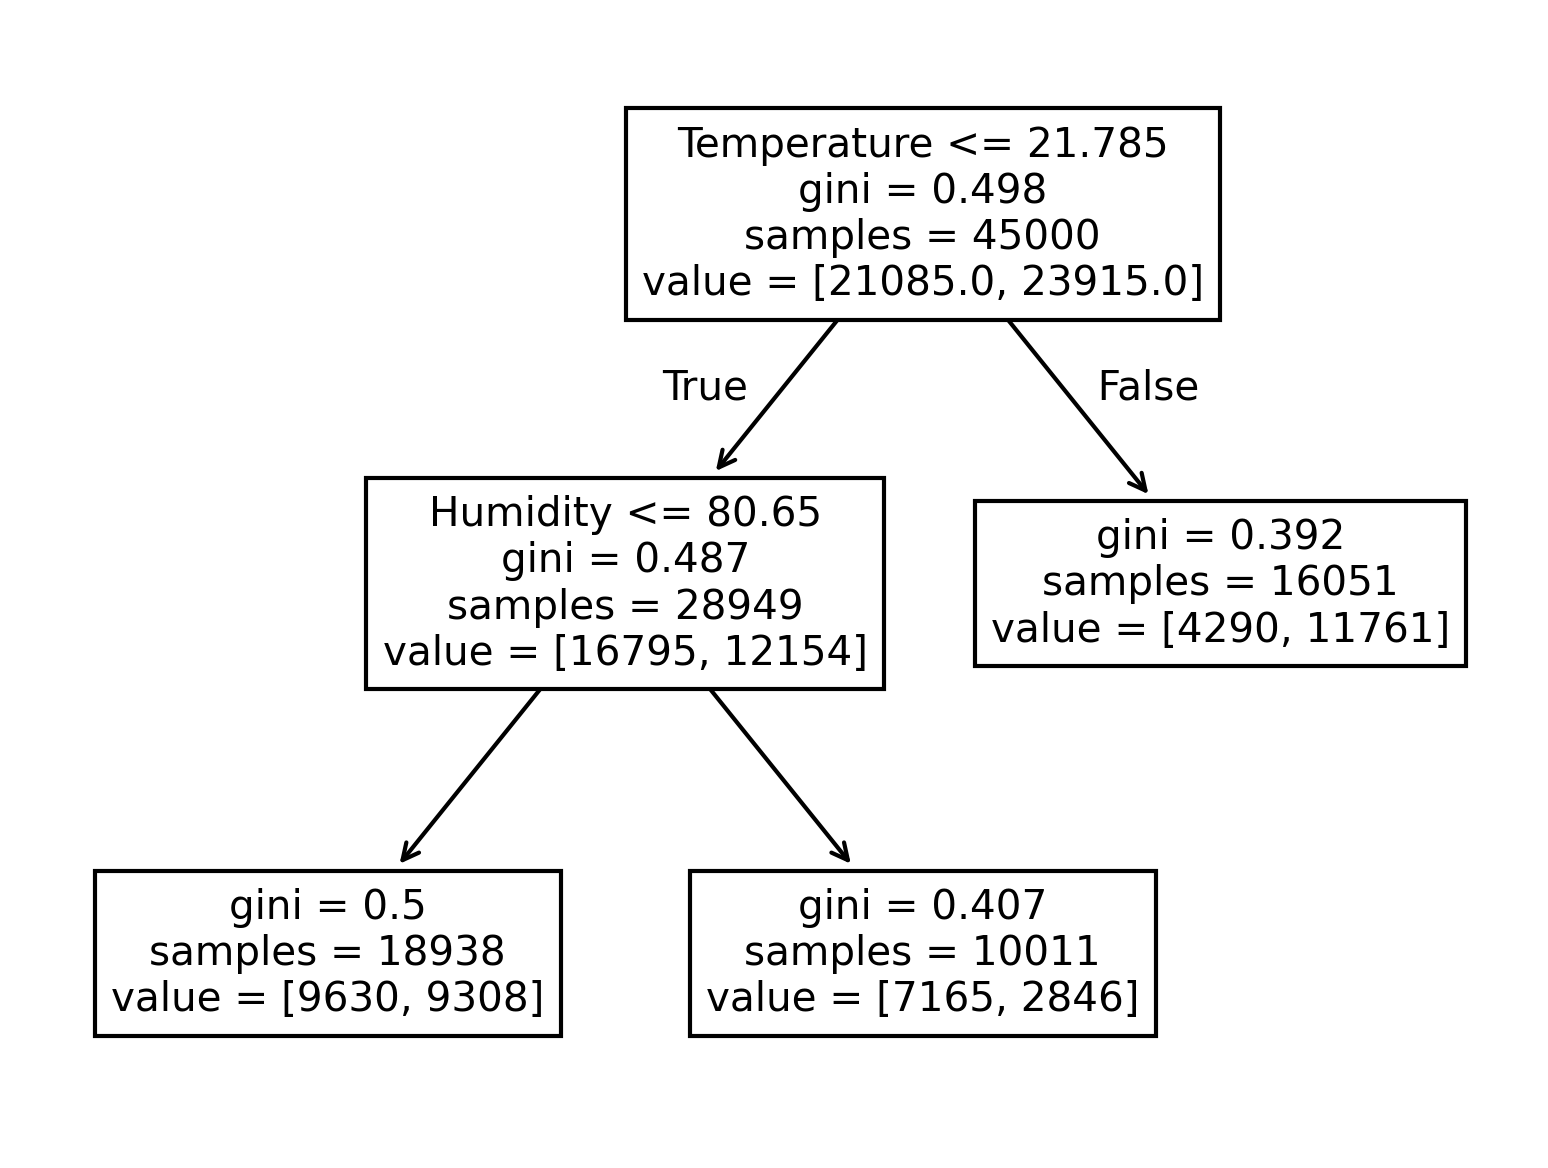

In [19]:
# Now try min samples 10k, observe Humidity is used
# Also try with min samples 5k, 1k, 500, 100 to see how tree depth grows
model = tree.DecisionTreeClassifier(min_samples_leaf=10000)
model.fit(train_X, train_df.label)
plt.figure(dpi=300)
_ = tree.plot_tree(model, feature_names=features)

## Evaluating DT performance

* With different min samples/leaf:
  * Performance on training data
  * Performance on testing data

In [20]:
from sklearn import metrics

features = ['Temperature', 'Humidity', 'Wind Speed']
train_X = train_df[features]
test_X = test_df[features]

# Training
model = tree.DecisionTreeClassifier(min_samples_leaf=15000) # Try min samples = 15k, 10k, 5k, 1k, 500, 100, 10
model.fit(train_X, train_df.label)

# Testing
test_pred = model.predict(test_X)
train_pred = model.predict(train_X)

# Compute Kappa on train and test data
train_kappa = metrics.cohen_kappa_score(train_df.label, train_pred)
test_kappa = metrics.cohen_kappa_score(test_df.label, test_pred)
print(f'Model predictions train:{train_kappa}, test:{test_kappa}')

Model predictions train:0.28209602813064394, test:0.023999655874861414


## Visualize decision boundary

* Observe for different depths
* Observe boundary is always perpendicular to one axis

In [21]:
# Tough to visualize for 3 features! Need 3D plot so let's just pick 2 features for simplicity
# Though note that this won't match earlier trees now

# Train DT model on temperature and humidity
model = tree.DecisionTreeClassifier(min_samples_leaf=1000)
features = ['Temperature', 'Humidity']
train_X = train_df[features]
model.fit(train_X, train_df.label)

DecisionTreeClassifier(min_samples_leaf=1000)

In [22]:
print(train_df.Temperature.describe())
print('\n') # just print a newline between these two
print(train_df.Humidity.describe())

count    45000.000000
mean        19.540059
std          5.772074
min          3.247000
25%         15.120000
50%         19.870000
75%         23.650000
max         40.010000
Name: Temperature, dtype: float64


count    45000.000000
mean        68.094536
std         15.895661
min         11.340000
25%         57.910000
50%         69.900000
75%         81.600000
max         93.800000
Name: Humidity, dtype: float64


In [23]:
# Create a 2D grid of Temperature and Humidity values
temperatures = []  # 3.24 to 40
humidities = []  # 11.34 to 93.8

# Create ranges of values for temperature (from 3.24 to 40) and humidity (from 11.34 to 93.8) with a step size of 0.5
for t in np.arange(3.24, 40, .5):
    for h in np.arange(11.34, 93.8, .5):
        temperatures.append(t)
        humidities.append(h)
grid_df = pd.DataFrame({'Temperature': temperatures, 'Humidity': humidities})
grid_df

,Temperature,Humidity
0,3.24,11.34
1,3.24,11.84
2,3.24,12.34
3,3.24,12.84
4,3.24,13.34
...,...,...
12205,39.74,91.34
12206,39.74,91.84
12207,39.74,92.34
12208,39.74,92.84


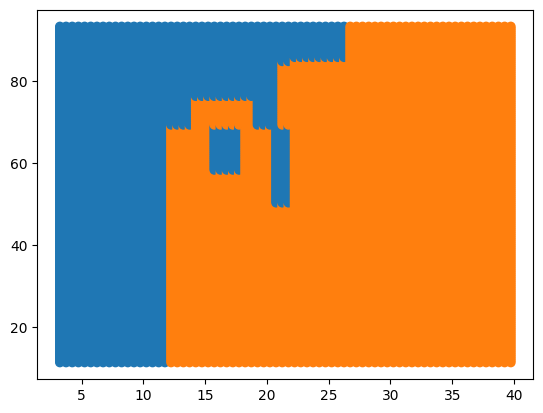

In [24]:
# Predict on this 2D grid and color-code points
pred = model.predict(grid_df)
colors = []
for p in pred:
    colors.append('C' + str(int(p))) # For each prediction, a color is generated and appended to the colors list
plt.scatter(grid_df.Temperature, grid_df.Humidity, c=colors)
plt.show()

# Final step! 
Try different `min_samples_leaf` = 15k, 10k, 5k, 1k, 500, 100, 10 to see how the decision boundary changes